<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/47944250_SushrutKuchik_PretrainedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Sushrut Kuchik<br>
Student ID: 47944250<br>
<h1> AI Powered Coin Classification: AlexNet and VCG Implementation</h1><h3>Phase 1.2 Image classification a pretrained model</h3>
<h5> Link to Github: <a href=https://github.com/ksushrut/CoinClassifier>https://github.com/ksushrut/CoinClassifier</a></h5>
<h5> Link to Google Drive: <a href=https://drive.google.com/drive/folders/1g-UgIRZmp18RvbeZtlBIuyIP2Vh_wDe_?usp=sharing>https://drive.google.com/drive/folders/1g-UgIRZmp18RvbeZtlBIuyIP2Vh_wDe_?usp=sharing</a></h5>

In [31]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch
from torchvision import transforms
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

In [32]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
!git clone https://github.com/ksushrut/CoinClassifier.git

Cloning into 'CoinClassifier'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 183 (delta 25), reused 6 (delta 6), pack-reused 137 (from 1)
Receiving objects: 100% (183/183), 25.59 MiB | 27.61 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [4]:
!cp -r "/content/drive/My Drive/CoinImages/PreprocessedCoinImages" /content/

In [34]:
csv_loc='https://raw.githubusercontent.com/ksushrut/CoinClassifier/refs/heads/main/processed_data.csv'

In [35]:
df=pd.read_csv(csv_loc)
df

,URL,image name,country,width,height,label
0,/content/drive/My Drive/CoinImages/Preprocesse...,14t.jpg,Australia,224,224,AUD 50 Cents
1,/content/drive/My Drive/CoinImages/Preprocesse...,10t.jpg,Australia,224,224,AUD 50 Cents
2,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpg,Australia,224,224,AUD 50 Cents
3,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpg,Australia,224,224,AUD 50 Cents
4,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,Australia,224,224,AUD 50 Cents
...,...,...,...,...,...,...
2418,/content/drive/My Drive/CoinImages/Preprocesse...,4h.jpeg,India,224,224,INR 10Rs
2419,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpeg,India,224,224,INR 10Rs
2420,/content/drive/My Drive/CoinImages/Preprocesse...,11t.jpeg,India,224,224,INR 10Rs
2421,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpeg,India,224,224,INR 10Rs


Encode the Label column using Label Encoder

In [38]:
label_encoder = LabelEncoder()
df['encoded_class'] = label_encoder.fit_transform(df['label'])

In [40]:
df['URL'] = df['URL'].str.replace("/content/drive/My Drive/CoinImages/Preprocessed_Images",
                                  "/content/PreprocessedCoinImages")

In [47]:
df

,URL,image name,country,width,height,label,encoded_class
0,/content/drive/My Drive/CoinImages/Preprocesse...,14t.jpg,Australia,224,224,AUD 50 Cents,23
1,/content/drive/My Drive/CoinImages/Preprocesse...,10t.jpg,Australia,224,224,AUD 50 Cents,23
2,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpg,Australia,224,224,AUD 50 Cents,23
3,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpg,Australia,224,224,AUD 50 Cents,23
4,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,Australia,224,224,AUD 50 Cents,23
...,...,...,...,...,...,...,...
2418,/content/drive/My Drive/CoinImages/Preprocesse...,4h.jpeg,India,224,224,INR 10Rs,32
2419,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpeg,India,224,224,INR 10Rs,32
2420,/content/drive/My Drive/CoinImages/Preprocesse...,11t.jpeg,India,224,224,INR 10Rs,32
2421,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpeg,India,224,224,INR 10Rs,32


#### Sliced Dataframe: The Images collected by me

In [59]:
df_sushrut = df[(df['country'] == 'India') | (df['country'] == 'United States')].reset_index(drop=True)

In [60]:
df_sushrut

,URL,image name,country,width,height,label,encoded_class
0,/content/drive/My Drive/CoinImages/Preprocesse...,2t.jpeg,United States,224,224,USD 10¢,43
1,/content/drive/My Drive/CoinImages/Preprocesse...,18t.jpeg,United States,224,224,USD 10¢,43
2,/content/drive/My Drive/CoinImages/Preprocesse...,17h.jpeg,United States,224,224,USD 10¢,43
3,/content/drive/My Drive/CoinImages/Preprocesse...,22h.jpg,United States,224,224,USD 10¢,43
4,/content/drive/My Drive/CoinImages/Preprocesse...,21t.jpg,United States,224,224,USD 10¢,43
...,...,...,...,...,...,...,...
543,/content/drive/My Drive/CoinImages/Preprocesse...,4h.jpeg,India,224,224,INR 10Rs,32
544,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpeg,India,224,224,INR 10Rs,32
545,/content/drive/My Drive/CoinImages/Preprocesse...,11t.jpeg,India,224,224,INR 10Rs,32
546,/content/drive/My Drive/CoinImages/Preprocesse...,3h.jpeg,India,224,224,INR 10Rs,32


## Data Visualization

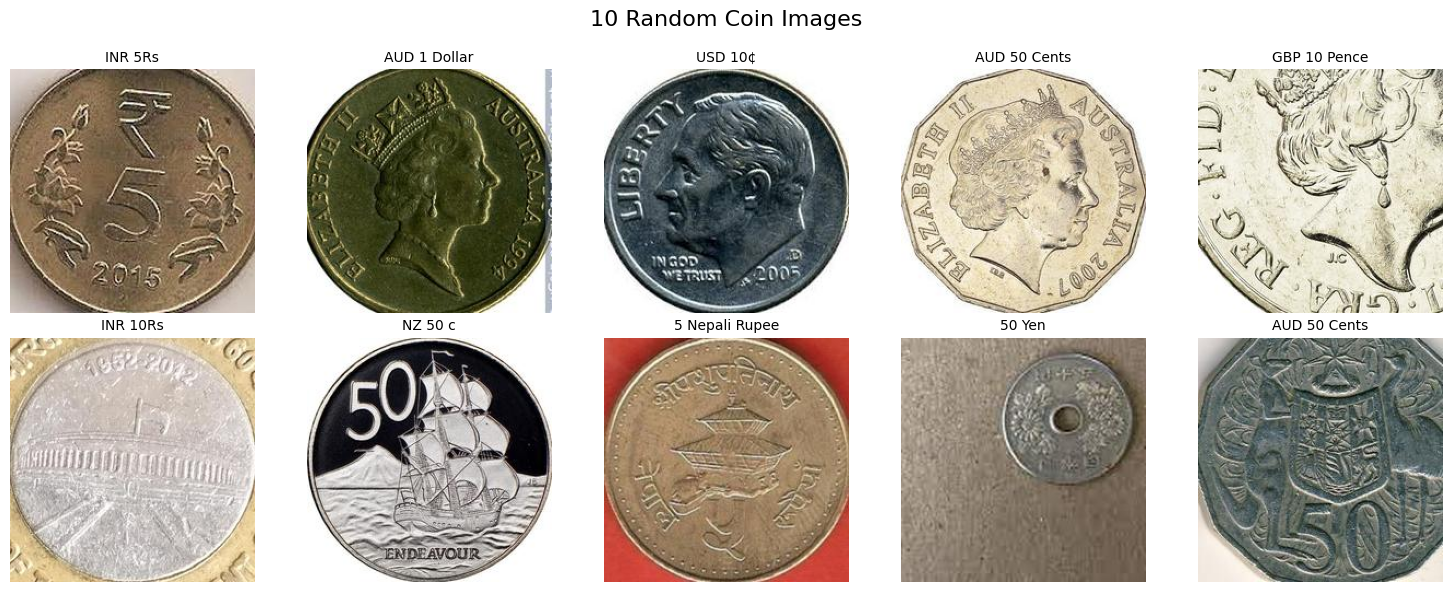

In [58]:
import matplotlib.pyplot as plt
import random
from PIL import Image

# Shuffle and pick 10 random rows from the dataframe
random_images = df.sample(n=10).reset_index(drop=True)

# Create a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("10 Random Coin Images", fontsize=16)

for i in range(10):
    row = random_images.iloc[i]
    full_path = row['URL'] + '/' + row['image name']
    label = row['label']

    try:
        image = Image.open(full_path)

        ax = axs[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label, fontsize=10)
        ax.axis('off')
    except Exception as e:
        print(f"Failed to open image: {full_path} — {e}")

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

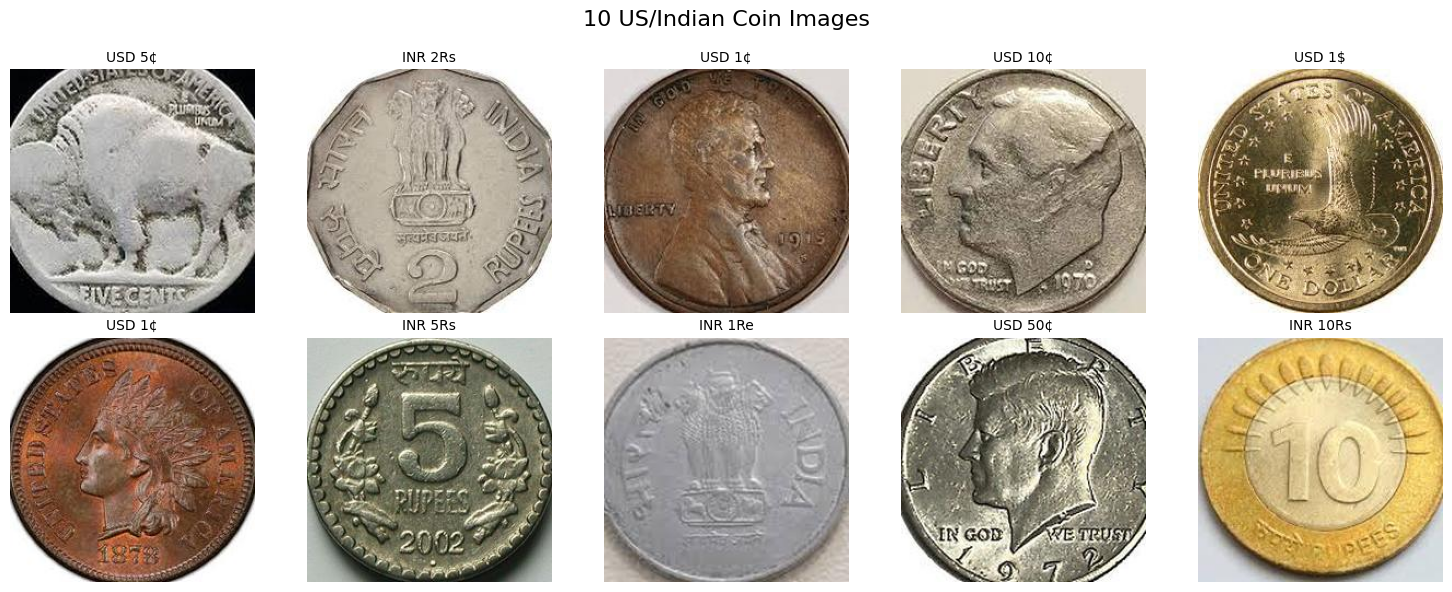

In [65]:
random_images = df_sushrut.sample(n=10).reset_index(drop=True)

# Create a 2x5 grid for displaying images
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("10 US/Indian Coin Images", fontsize=16)

for i in range(10):
    row = random_images.iloc[i]
    full_path = row['URL'] + '/' + row['image name']
    label = row['label']

    try:
        image = Image.open(full_path)

        ax = axs[i // 5, i % 5]
        ax.imshow(image)
        ax.set_title(label, fontsize=10)
        ax.axis('off')
    except Exception as e:
        print(f"Failed to open image: {full_path} — {e}")

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

###Conclusion: We can see, that the images visualized are coins with different wear condition, lighting conditions.  



## Create DataLoader and Split the Data into a 60-10-30(train-val-test)

In [66]:
class CoinImageDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe.reset_index(drop=True)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]

        # Build full image path from folder + image name
        img_folder = row['URL']
        img_name = str(row['image name']).strip()
        img_path = img_folder +'/'+ img_name
        label = row['encoded_class']

        image = Image.open(img_path).convert("RGB")
        image = torch.tensor(np.array(image)).permute(2, 0, 1).float() / 255.0


        return image, label

In [114]:
train_df, val_test_df = train_test_split(df, test_size=0.4, random_state=42, stratify=df['encoded_class'])
val_df, test_df = train_test_split(val_test_df, test_size=0.75,
random_state=42, stratify=val_test_df['encoded_class'])

train_dataset = CoinImageDataset(train_df)
val_dataset = CoinImageDataset(val_df)
test_dataset = CoinImageDataset(test_df)


train_loader = DataLoader(train_dataset, batch_size=32,
shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [74]:
train_df

,URL,image name,country,width,height,label,encoded_class
1048,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,New Zealand,224,224,NZ Dollar 1,40
951,/content/drive/My Drive/CoinImages/Preprocesse...,21h.jpeg,New Zealand,224,224,NZ 20 c,38
2028,/content/drive/My Drive/CoinImages/Preprocesse...,11h.jpeg,United States,224,224,USD 1$,42
2099,/content/drive/My Drive/CoinImages/Preprocesse...,13t.jpeg,United States,224,224,USD 50¢,46
1162,/content/drive/My Drive/CoinImages/Preprocesse...,19h.jpg,United Kingdom,224,224,GBP 10 Pence,26
...,...,...,...,...,...,...,...
771,/content/drive/My Drive/CoinImages/Preprocesse...,8t.jpg,Nepal,224,224,5 Nepali Rupee,12
503,/content/drive/My Drive/CoinImages/Preprocesse...,23t.jpeg,Japan,224,224,100 Yen,7
1224,/content/drive/My Drive/CoinImages/Preprocesse...,20t.jpg,United Kingdom,224,224,GBP 2 Pence,27
1721,/content/drive/My Drive/CoinImages/Preprocesse...,24t.jpeg,Canada,224,224,25 cents,11


In [75]:
val_df

,URL,image name,country,width,height,label,encoded_class
166,/content/drive/My Drive/CoinImages/Preprocesse...,12h.jpg,Australia,224,224,AUD 10 Cents,19
2252,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,India,224,224,INR 1Re,33
1556,/content/drive/My Drive/CoinImages/Preprocesse...,20h.jpeg,Canada,224,224,1 cent,3
1805,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,Canada,224,224,1 dollar,4
958,/content/drive/My Drive/CoinImages/Preprocesse...,2h.jpg,New Zealand,224,224,NZ 10 c,37
...,...,...,...,...,...,...,...
961,/content/drive/My Drive/CoinImages/Preprocesse...,3t.jpg,New Zealand,224,224,NZ 10 c,37
1755,/content/drive/My Drive/CoinImages/Preprocesse...,18h.jpeg,Canada,224,224,5 cents,14
152,/content/drive/My Drive/CoinImages/Preprocesse...,1t.jpg,Australia,224,224,AUD 1 Dollar,18
750,/content/drive/My Drive/CoinImages/Preprocesse...,22t.jpeg,Nepal,224,224,1 Nepali Paisa,0


In [76]:
test_df

,URL,image name,country,width,height,label,encoded_class
799,/content/drive/My Drive/CoinImages/Preprocesse...,20t.jpeg,Nepal,224,224,5 Nepali Rupee,12
1551,/content/drive/My Drive/CoinImages/Preprocesse...,15h.jpeg,Canada,224,224,1 cent,3
1878,/content/drive/My Drive/CoinImages/Preprocesse...,22h.jpg,United States,224,224,USD 10¢,43
156,/content/drive/My Drive/CoinImages/Preprocesse...,6h.jpg,Australia,224,224,AUD 10 Cents,19
1161,/content/drive/My Drive/CoinImages/Preprocesse...,5h.jpg,United Kingdom,224,224,GBP 10 Pence,26
...,...,...,...,...,...,...,...
1004,/content/drive/My Drive/CoinImages/Preprocesse...,24h.jpg,New Zealand,224,224,NZ 10 c,37
1885,/content/drive/My Drive/CoinImages/Preprocesse...,20t.jpeg,United States,224,224,USD 10¢,43
489,/content/drive/My Drive/CoinImages/Preprocesse...,21h.jpeg,Japan,224,224,100 Yen,7
86,/content/drive/My Drive/CoinImages/Preprocesse...,24t.jpg,Australia,224,224,AUD 2 Dollar,20


### Observations:
The dataset is now split into 60-10-30(train-val-test). Initially the dataset was split into 60% train and 40% temporary dataset.<br>
Then the temporary dataset is split into 25% validation and 75% test dataset<br>25% of 40% of original= 10% of original<br>75% of 40% of original = 30% of original

## Data Exploration

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2423 entries, 0 to 2422
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URL            2423 non-null   object
 1   image name     2423 non-null   object
 2   country        2423 non-null   object
 3   width          2423 non-null   int64 
 4   height         2423 non-null   int64 
 5   label          2423 non-null   object
 6   encoded_class  2423 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 132.6+ KB


In [78]:
df_sushrut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URL            548 non-null    object
 1   image name     548 non-null    object
 2   country        548 non-null    object
 3   width          548 non-null    int64 
 4   height         548 non-null    int64 
 5   label          548 non-null    object
 6   encoded_class  548 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 30.1+ KB


In [79]:
df['country'].value_counts()

,count
country,
United Kingdom,418
Canada,351
Australia,306
Japan,300
United States,300
Nepal,250
New Zealand,250
India,248


In [80]:
df_sushrut['country'].value_counts()

,count
country,
United States,300
India,248


In [81]:
df.groupby(['country', 'label'])[['country', 'label']].value_counts()

country         label          
Australia       AUD 1 Dollar       50
                AUD 10 Cents       50
                AUD 2 Dollar       52
                AUD 20 Cents       50
                AUD 5 Cents        52
                AUD 50 Cents       52
Canada          1 cent             49
                1 dollar           50
                10 cents           50
                2 dollars          50
                25 cents           50
                5 cents            52
                50 cents           50
India           INR 10Rs           49
                INR 1Re            50
                INR 20Rs           49
                INR 2Rs            50
                INR 5Rs            50
Japan           1 Yen              50
                10 Yen             50
                100 Yen            50
                5 Yen              50
                50 Yen             50
                500 Yen            50
Nepal           1 Nepali Paisa     50
                1 Nepali Rupee     50
                2 Nepali Rupee     50
                25 Nepali Paisa    50
                5 Nepali Rupee     50
New Zealand     NZ 10 c            50
                NZ 20 c            50
                NZ 50 c            50
                NZ Dollar 1        50
                NZ Dollar 2        50
United Kingdom  GBP 1 Penny        50
                GBP 1 Pound        52
                GBP 10 Pence       52
                GBP 2 Pence        50
                GBP 2 Pound        52
                GBP 20 Pence       58
                GBP 5 Pence        52
                GBP 50 Pence       52
United States   USD 1$             50
                USD 10¢            50
                USD 1¢             50
                USD 25¢            50
                USD 50¢            50
                USD 5¢             50
Name: count, dtype: int64

In [82]:
df_sushrut.groupby(['country', 'label'])[['country', 'label']].value_counts()


country        label   
India          INR 10Rs    49
               INR 1Re     50
               INR 20Rs    49
               INR 2Rs     50
               INR 5Rs     50
United States  USD 1$      50
               USD 10¢     50
               USD 1¢      50
               USD 25¢     50
               USD 50¢     50
               USD 5¢      50
Name: count, dtype: int64

### Conclusion:
There are 8 countries in total with **48 classes**. Overall count of each class is around 50.<br>For the countries and their classes that I collected (US and India) there are **548** images and **11** classes.

# AlexNet Classifier: Pretrained Model

In [83]:
class AlexNetClassifier(nn.Module):
    def __init__(self, num_classes):
        super(AlexNetClassifier, self).__init__()
        # Load the pretrained AlexNet model
        self.alexnet = models.alexnet(pretrained=True)

        # Replace the last fully connected layer to match the number of classes in your dataset
        self.alexnet.classifier[6] = nn.Linear(self.alexnet.classifier[6].in_features, num_classes)

    def forward(self, x):
        # Forward pass through the AlexNet model
        return self.alexnet(x)

In [84]:
num_classes = df['encoded_class'].nunique()
print("Number of classes",num_classes)
model = AlexNetClassifier(num_classes=num_classes)
print(model)

Number of classes 48


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNetClassifier(
  (alexnet): AlexNet(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
      (1): ReLU(inplace=True)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
      (4): ReLU(inplace=True)
      (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
      (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (7): ReLU(inplace=True)
      (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (9): ReLU(inplace=True)
      (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
    (classifier): Sequential(
      (0): Dropout(p=0.5, inplace=Fals

In [88]:
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs=10
acc_list_alexnet=[]
loss_alexnet=[]
for epoch in range(10):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    accuracy = 100 * correct / total
    acc_list_alexnet.append(accuracy)
    loss_alexnet.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Save the model after training
torch.save(model.state_dict(), 'alexnet_model.pth')
print("Model saved as 'alexnet_model.pth'")

Epoch [1/10], Loss: 3.5766, Accuracy: 10.87%
Epoch [2/10], Loss: 2.1148, Accuracy: 40.88%
Epoch [3/10], Loss: 1.0867, Accuracy: 69.10%
Epoch [4/10], Loss: 0.6280, Accuracy: 81.35%
Epoch [5/10], Loss: 0.3583, Accuracy: 88.92%
Epoch [6/10], Loss: 0.2343, Accuracy: 93.05%
Epoch [7/10], Loss: 0.1675, Accuracy: 95.11%
Epoch [8/10], Loss: 0.1267, Accuracy: 96.08%
Epoch [9/10], Loss: 0.0701, Accuracy: 97.80%
Epoch [10/10], Loss: 0.0647, Accuracy: 98.21%
Model saved as 'alexnet_model.pth'


In [92]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
val_acc_alexnet=100 * correct / total
print(f"Validation Accuracy: {val_acc_alexnet:.2f}%")


model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc_alexnet=100 * correct / total
print(f"Test Accuracy: {test_acc_alexnet:.2f}%")

Validation Accuracy: 73.97%
Test Accuracy: 73.49%


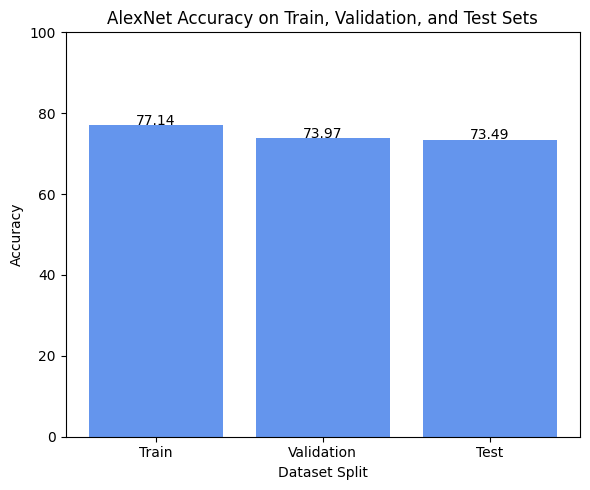

In [111]:
import matplotlib.pyplot as plt

# Example accuracy values for AlexNet
accuracies = [sum(acc_list_alexnet)/10,val_acc_alexnet , test_acc_alexnet]  # Train, Val, Test
labels = ['Train', 'Validation', 'Test']

# Create the bar chart
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, accuracies, color='cornflowerblue')

# Add labels and title
plt.xlabel('Dataset Split')
plt.ylabel('Accuracy')
plt.title('AlexNet Accuracy on Train, Validation, and Test Sets')
plt.ylim(0, 100)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.02, f'{height:.2f}', ha='center')

plt.tight_layout()
plt.show()

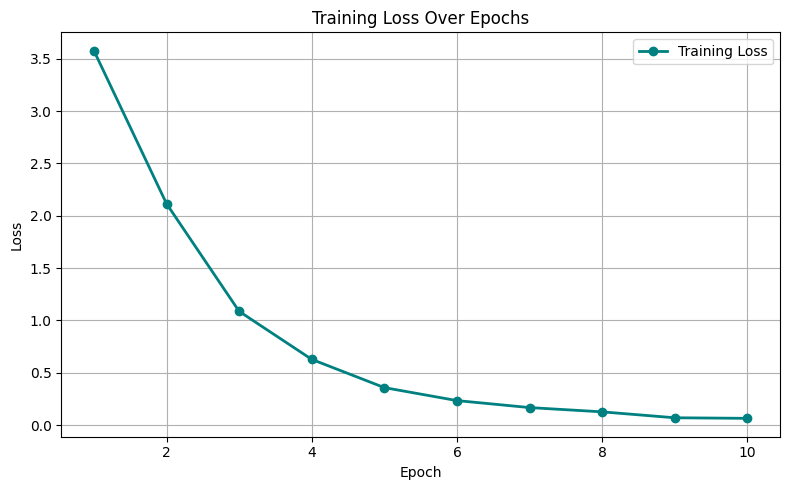

In [112]:
import matplotlib.pyplot as plt

# Example training loss over 10 epochs
epochs = list(range(1, 11))
train_loss = loss_alexnet
# Create the line plot
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', color='teal', linewidth=2, label='Training Loss')

# Add labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

## VCG

In [115]:
import torch
import torch.nn as nn
from torchvision import models

class PretrainedVGG16(nn.Module):
    def __init__(self, num_classes, freeze_features=True):
        super(PretrainedVGG16, self).__init__()

        # Load pretrained VGG16
        self.vgg = models.vgg16(pretrained=True)

        # Optionally freeze feature extractor
        if freeze_features:
            for param in self.vgg.features.parameters():
                param.requires_grad = False

        # Replace classifier with a new one
        self.vgg.classifier = nn.Sequential(
            nn.Linear(25088, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        return self.vgg(x)

In [116]:
model = PretrainedVGG16(num_classes=num_classes, freeze_features=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


PretrainedVGG16(
  (vgg): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
num_epochs = 10
acc_vcg=[]
loss_vcg=[]
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    loss_vcg.append(running_loss/len(train_loader))
    acc_vcg.append(100 * correct / total)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")


In [ ]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No need to track gradients during validation
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
val_acc_vcg=100 * correct / total
print(f"Validation Accuracy: {val_acc_vcg:.2f}%")

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc_vcg=100 * correct / total
print(f"Test Accuracy: {test_acc_vcg:.2f}%")

Validation Accuracy: 81.96%
Test Accuracy: 85.19%


## Summary


*   The overall images present in CoinImages are 2423 images
*   There are 8 countries and 48 denominations in total
*   Alexnet gives good accuracy and is able to reduce losses as the number of epochs increase
* VCG also gives good accuracy and loss decreases
* As compared to Alexnet, VCG performs better
